In [30]:
import pandas as pd

In [31]:
experiments = 5
epochs = 100

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU', 'ThresholdedReLU']
# activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
            'data' : [pd.read_csv('./logs/mnist_lr_' + act +'_' + opt + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [32]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [33]:
check = check.sort_values(by=['val_acc'])
check.to_csv('./var_lr_check.csv')
check

config  exp       acc      loss  val_acc  val_loss       opt  \
116       linear_sgd  1.0  0.913050  0.309703   0.9206  0.272636       sgd   
117       linear_sgd  2.0  0.911933  0.310285   0.9218  0.270918       sgd   
119       linear_sgd  4.0  0.912117  0.306582   0.9221  0.272385       sgd   
115       linear_sgd  0.0  0.915017  0.304581   0.9223  0.271048       sgd   
118       linear_sgd  3.0  0.917067  0.295666   0.9240  0.268246       sgd   
122   linear_Adagrad  2.0  0.919633  0.284915   0.9252  0.264929   Adagrad   
123   linear_Adagrad  3.0  0.920550  0.285692   0.9253  0.264670   Adagrad   
126  linear_Adadelta  1.0  0.923783  0.276759   0.9253  0.264956  Adadelta   
121   linear_Adagrad  1.0  0.919883  0.288916   0.9255  0.265987   Adagrad   
114      linear_adam  4.0  0.927350  0.261868   0.9257  0.268011      adam   
120   linear_Adagrad  0.0  0.918433  0.288683   0.9258  0.263619   Adagrad   
125  linear_Adadelta  0.0  0.922300  0.281309   0.9258  0.264808  Adadelta   
124   linear_Adagrad  4.0  0.919533  0.284790   0.9260  0.264683   Adagrad   
113      linear_adam  3.0  0.927417  0.262141   0.9260  0.269125      adam   
134    linear_Adamax  4.0  0.926283  0.265245   0.9261  0.266278    Adamax   
133    linear_Adamax  3.0  0.926000  0.268482   0.9261  0.264773    Adamax   
130    linear_Adamax  0.0  0.926983  0.266413   0.9261  0.265945    Adamax   
129  linear_Adadelta  4.0  0.922633  0.280802   0.9261  0.264565  Adadelta   
136     linear_Nadam  1.0  0.929750  0.254297   0.9264  0.272328     Nadam   
132    linear_Adamax  2.0  0.926033  0.266420   0.9264  0.265576    Adamax   
110      linear_adam  0.0  0.926350  0.267118   0.9265  0.267327      adam   
128  linear_Adadelta  3.0  0.921700  0.280486   0.9265  0.265047  Adadelta   
137     linear_Nadam  2.0  0.929900  0.256742   0.9266  0.270646     Nadam   
112      linear_adam  2.0  0.927667  0.260940   0.9266  0.268306      adam   
131    linear_Adamax  1.0  0.925217  0.269505   0.9267  0.266107    Adamax   
138     linear_Nadam  3.0  0.931250  0.253963   0.9268  0.274803     Nadam   
106      linear_rmsp  1.0  0.924683  0.277638   0.9268  0.271667      rmsp   
111      linear_adam  1.0  0.926817  0.263354   0.9269  0.269033      adam   
108      linear_rmsp  3.0  0.923917  0.278015   0.9269  0.270623      rmsp   
107      linear_rmsp  2.0  0.924783  0.272774   0.9270  0.273285      rmsp   
..               ...  ...       ...       ...      ...       ...       ...   
149         elu_adam  4.0  0.986717  0.039949   0.9797  0.076183      adam   
79         relu_adam  4.0  0.988317  0.035104   0.9797  0.079609      adam   
75         relu_adam  0.0  0.986750  0.038652   0.9797  0.077866      adam   
145         elu_adam  0.0  0.985533  0.041778   0.9798  0.074252      adam   
355       PReLU_adam  0.0  0.984117  0.048716   0.9799  0.077791      adam   
242   softplus_Nadam  2.0  0.987783  0.040155   0.9799  0.091916     Nadam   
218    softplus_adam  3.0  0.983933  0.048929   0.9800  0.077826      adam   
78         relu_adam  3.0  0.985667  0.042178   0.9801  0.076978      adam   
141         elu_rmsp  1.0  0.981300  0.062914   0.9802  0.088573      rmsp   
168       elu_Adamax  3.0  0.980650  0.058531   0.9802  0.065536    Adamax   
161     elu_Adadelta  1.0  0.978850  0.065781   0.9803  0.070176  Adadelta   
216    softplus_adam  1.0  0.984333  0.049055   0.9803  0.074398      adam   
166       elu_Adamax  1.0  0.980900  0.056085   0.9803  0.069022    Adamax   
103       relu_Nadam  3.0  0.986350  0.040859   0.9804  0.084546     Nadam   
140         elu_rmsp  0.0  0.983150  0.055705   0.9805  0.087545      rmsp   
384      PReLU_Nadam  4.0  0.986800  0.040403   0.9805  0.084152     Nadam   
176        selu_rmsp  1.0  0.978017  0.076273   0.9805  0.125189      rmsp   
163     elu_Adadelta  3.0  0.976533  0.072957   0.9806  0.067716  Adadelta   
172        elu_Nadam  2.0  0.990000  0.029920   0.9806  0.076898     Nadam   
207       selu_Nadam  2.0  0.987333 

In [34]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        
        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch+1
        
        if(av_val_acc > max_val_acc):
            max_val_acc = av_val_acc
            data[d]['best']['max_val_acc'] = max_acc
            data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch+1
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch+1
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss)}, ignore_index=True)
    


In [35]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [36]:
results.head()

config       acc      loss  val_acc  val_loss       opt      act  \
0      sigmoid_rmsp  0.974640  0.086880  0.97452  0.105111      rmsp  sigmoid   
1      sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam  sigmoid   
2       sigmoid_sgd  0.910567  0.301698  0.93626  0.217361       sgd  sigmoid   
3   sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad  sigmoid   
4  sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133  Adadelta  sigmoid   

   max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
0           96.0               63.0            96.0                38.0  
1           82.0               48.0            82.0                36.0  
2          100.0              100.0           100.0               100.0  
3           97.0              100.0           100.0               100.0  
4           93.0               97.0            94.0                99.0

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

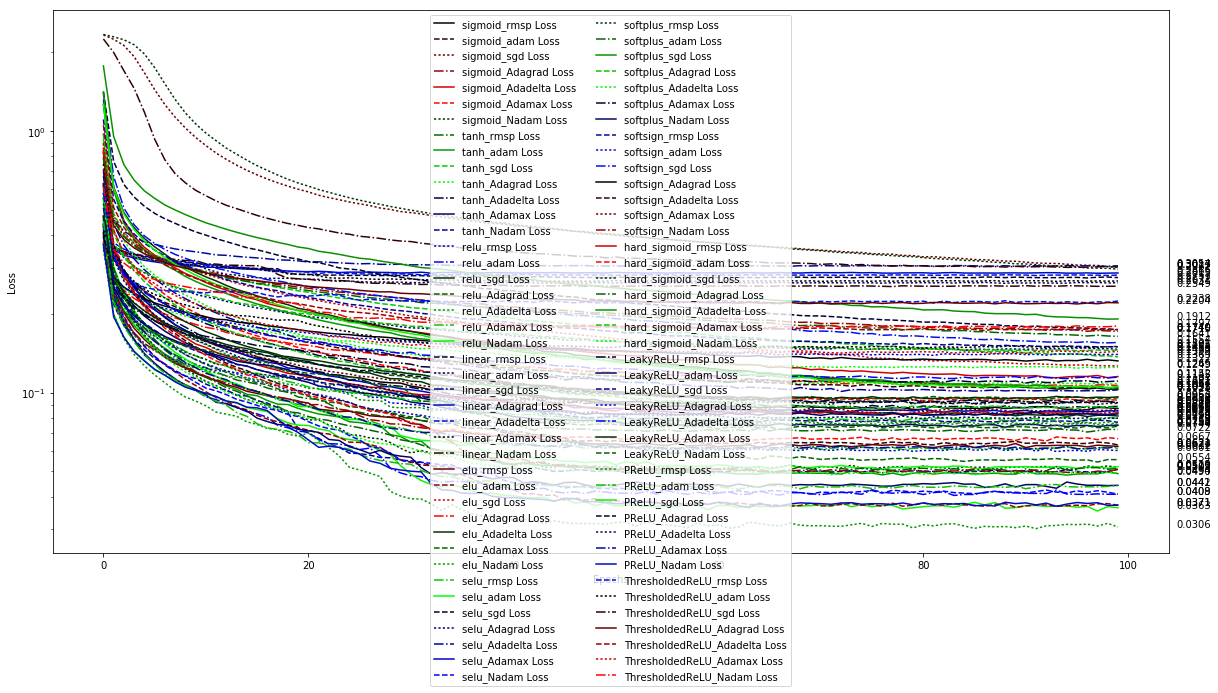

In [38]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

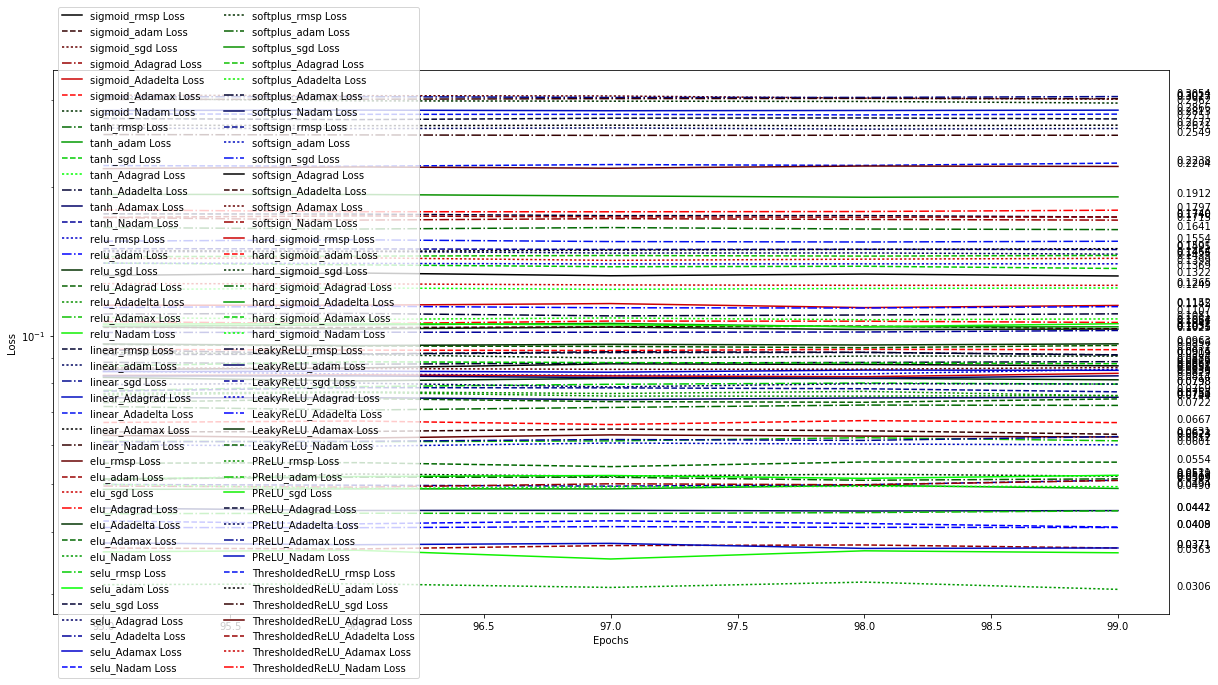

In [39]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [40]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075     Nadam   
13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
7                  tanh_rmsp  0.977370  0.072218  0.97432  0.091188      rmsp   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
49             softsign_rmsp  0.976270  0.076947  0.97354  0.093331      rmsp   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
4           sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133  Adadelta   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596     Nadam   
44              softplus_sgd  0.940360  0.191174  0.9

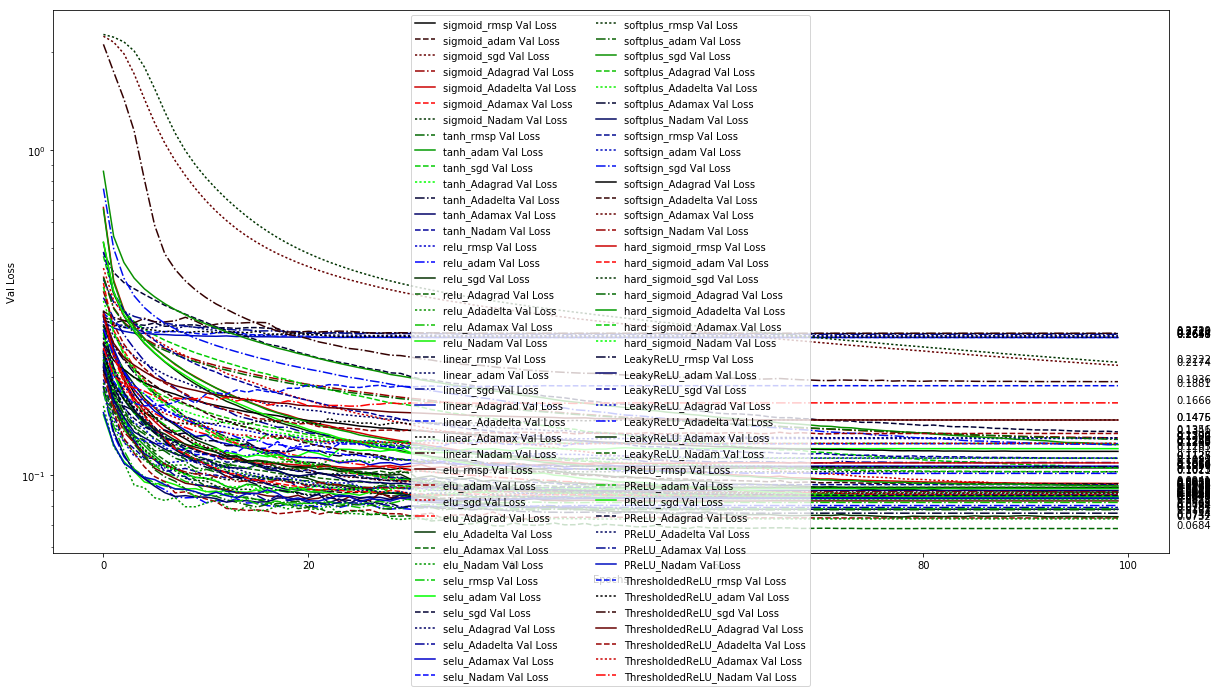

In [41]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

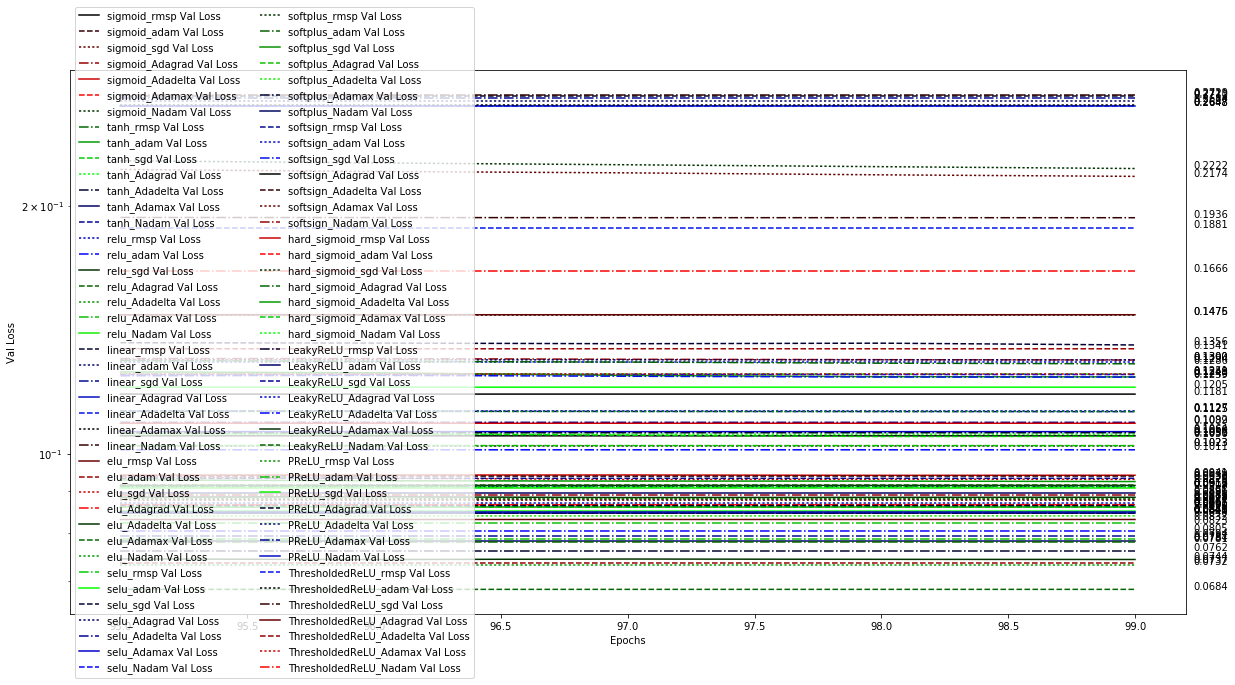

In [42]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [43]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

config       acc      loss  val_acc  val_loss       opt  \
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
32              elu_Adadelta  0.974273  0.081392  0.97774  0.074350  Adadelta   
47           softplus_Adamax  0.971837  0.088584  0.97688  0.076242    Adamax   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
46         softplus_Adadelta  0.966697  0.108145  0.97516  0.084006  Adadelta   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
11             tanh_Adadelta  0.971533  0.091387  0.97400  0.084684  Adadelta   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
5             sigmoid_Adamax  0.970593  0.093668  0.97346  0.084900    Adamax   
72                 PReLU_sgd  0.967717  0.105736  0.97360  0.085138       sgd   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
61       hard_sigmoid_Adamax  0.972957  0.087736  0.97398  0.086113    Adamax   
73             PReLU_Adagrad  0.971523  0.091459  0.97414  0.086460   Adagrad   
31               elu_Adagrad  0.966550  0.106369  0.97314  0.086655   Adagrad   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
17              relu_Adagrad  0.970660  0.095559  0.97366  0.086708   Adagrad   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
54           softsign_Adamax  0.972457  0.086186  0.97396  0.087800    Adamax   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
44              softplus_sgd  0.940360  0.191174  0.96154  0.123971       sgd   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
80   ThresholdedReLU_Adagrad  0.930837  0.220359  0.95532  0.147544   Adagrad   
78      ThresholdedReLU_adam  0.951440  0.150123  0.9

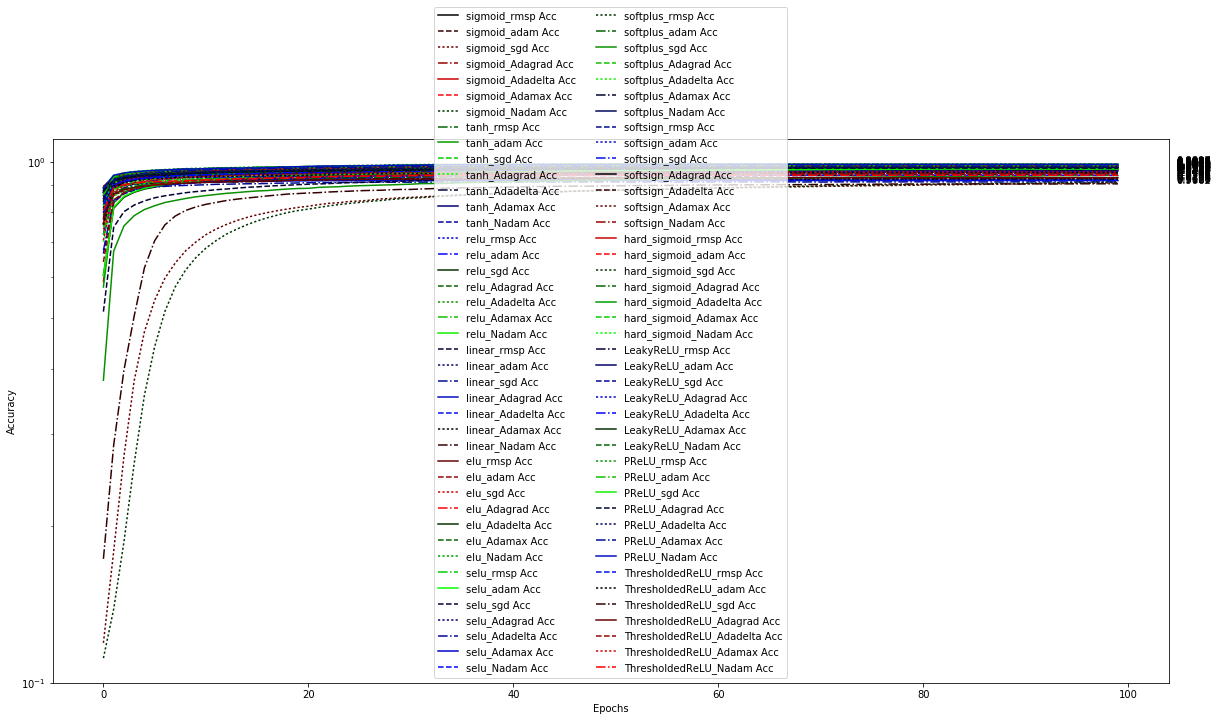

In [44]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

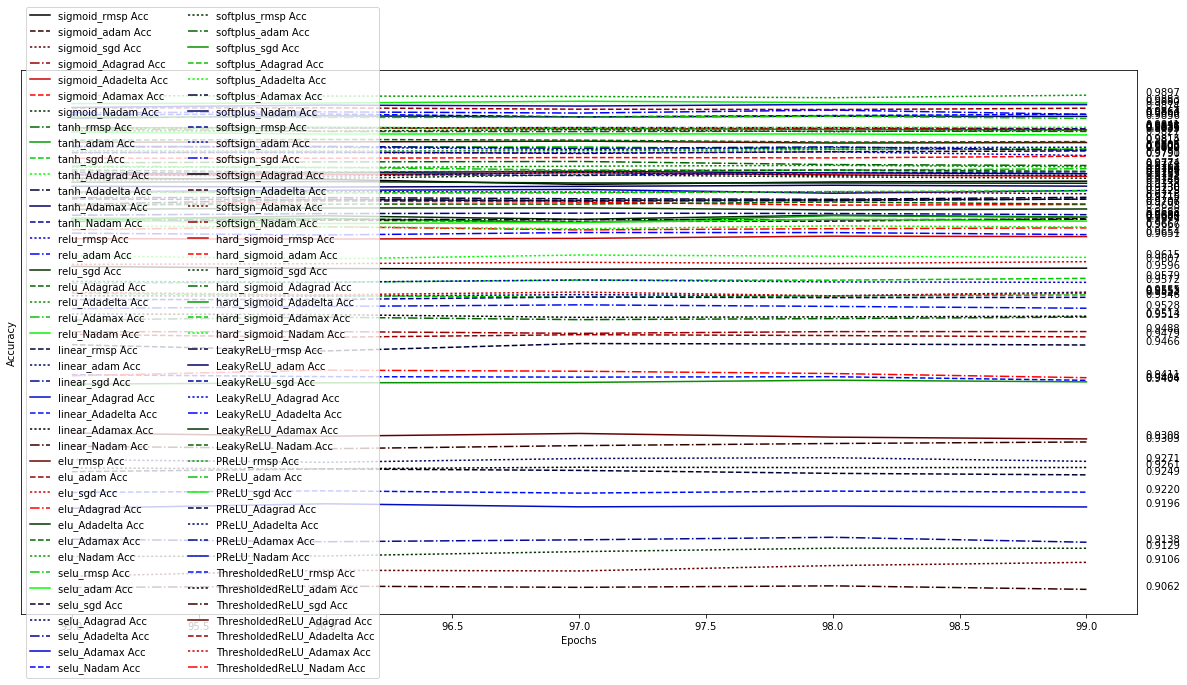

In [45]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [46]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257     Nadam   
55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075     Nadam   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
7                  tanh_rmsp  0.977370  0.072218  0.97432  0.091188      rmsp   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
49             softsign_rmsp  0.976270  0.076947  0.97354  0.093331      rmsp   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
..                       ...       ...       ...      ...       ...       ...   
4           sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133  Adadelta   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596     Nadam   
77      ThresholdedReLU_rmsp  0.940620  0.223819  0.9

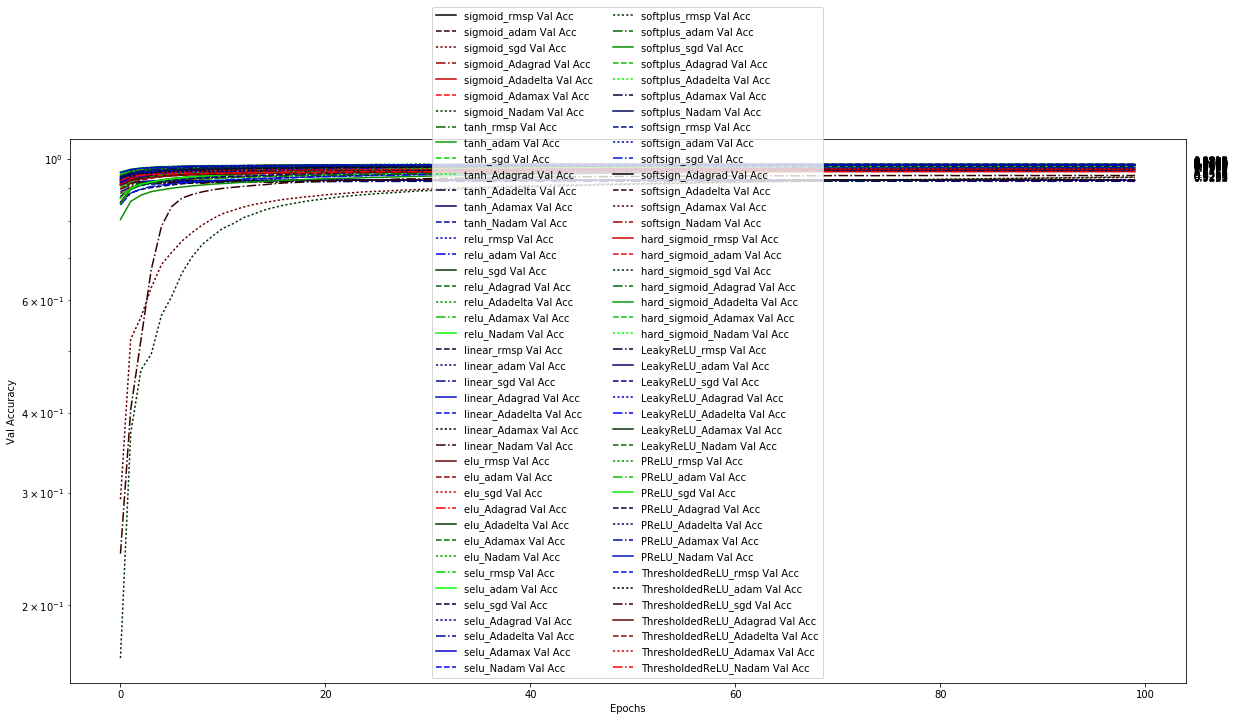

In [47]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

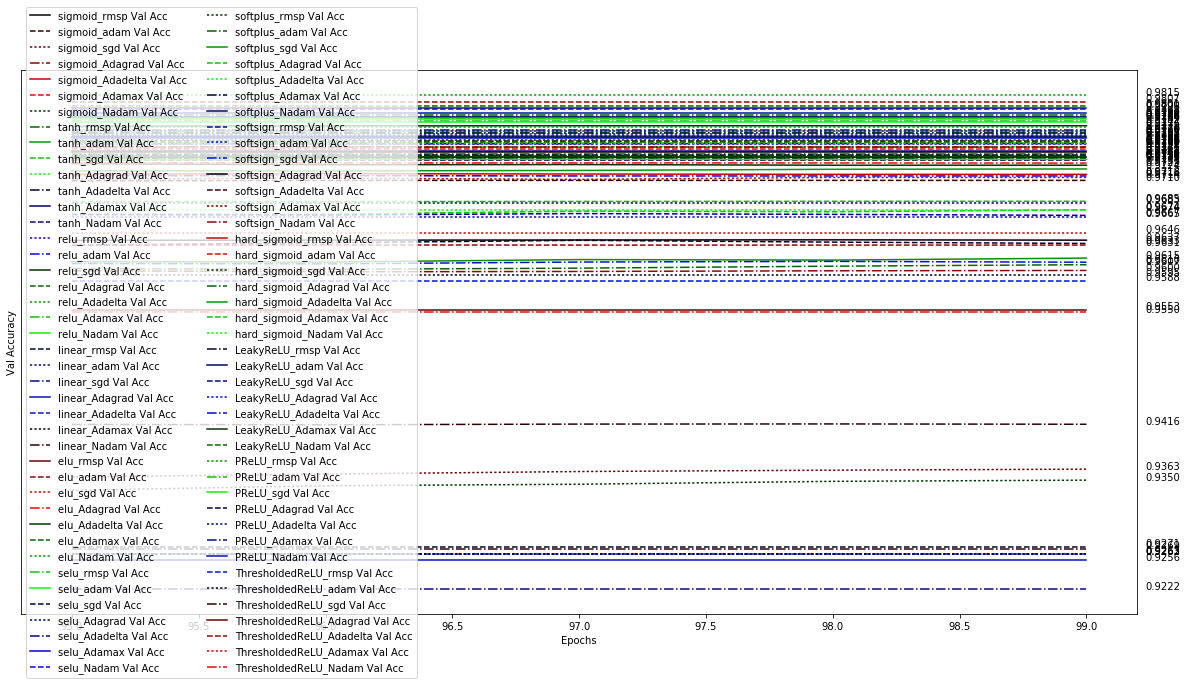

In [48]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [49]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
32              elu_Adadelta  0.974273  0.081392  0.97774  0.074350  Adadelta   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
42             softplus_rmsp  0.975153  0.090916  0.97704  0.102262      rmsp   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
47           softplus_Adamax  0.971837  0.088584  0.97688  0.076242    Adamax   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
40               selu_Adamax  0.973013  0.085076  0.97622  0.106351    Adamax   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
39             selu_Adadelta  0.968830  0.102472  0.97554  0.109163  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
53         softsign_Adadelta  0.968157  0.103295  0.97102  0.093909  Adadelta   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
44              softplus_sgd  0.940360  0.191174  0.96154  0.123971       sgd   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
77      ThresholdedReLU_rmsp  0.940620  0.223819  0.9

In [50]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
         config       acc      loss  val_acc  val_loss    opt    act  \
34    elu_Nadam  0.989707  0.030598  0.98152  0.073232  Nadam    elu   
20   relu_Nadam  0.988327  0.036294  0.97858  0.090803  Nadam   relu   
76  PReLU_Nadam  0.988037  0.037122  0.97928  0.084880  Nadam  PReLU   
29     elu_adam  0.987407  0.037115  0.98068  0.073690   adam    elu   
41   selu_Nadam  0.986350  0.040911  0.97976  0.124797  Nadam   selu   

    max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
34           86.0               49.0            92.0                42.0  
20           98.0               39.0            98.0                31.0  
76           94.0               41.0            64.0                26.0  
29           70.0               44.0            90.0                42.0  
41           70.0               61.0           100.0                12.0  

---Top by Val Accuracy---
        config       acc      loss  val_acc  val_loss     opt   act 

In [51]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.5
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [52]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

index                    config       acc      loss  val_acc  val_loss  \
0      29                  elu_adam  0.987407  0.037115  0.98068  0.073690   
1      34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232   
2      76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880   
3      20                relu_Nadam  0.988327  0.036294  0.97858  0.090803   
4      71                PReLU_adam  0.985610  0.044147  0.97864  0.082273   
5      48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579   
6      62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130   
7      15                 relu_adam  0.986323  0.040846  0.97878  0.080478   
8      42             softplus_rmsp  0.975153  0.090916  0.97704  0.102262   
9      19               relu_Adamax  0.980253  0.061220  0.97696  0.078712   
10     13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257   
11     14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425   
12      7                 tanh_rmsp  0.977370  0.072218  0.97432  0.091188   
13     36                 selu_adam  0.982710  0.052121  0.97818  0.120456   
14     43             softplus_adam  0.983327  0.051264  0.97904  0.078117   
15      6             sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949   
16     57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680   
17     28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162   
18      1              sigmoid_adam  0.979910  0.063110  0.97582  0.084802   
19     41                selu_Nadam  0.986350  0.040911  0.97976  0.124797   
20     69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563   
21     64            LeakyReLU_adam  0.973773  0.082904  0.97466  0.089553   
22     47           softplus_Adamax  0.971837  0.088584  0.97688  0.076242   
23     33                elu_Adamax  0.981543  0.055411  0.98012  0.068384   
24     35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948   
25     55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075   
26     50             softsign_adam  0.980560  0.060071  0.97544  0.087088   
27     56         hard_sigmoid_rmsp  0.975480  0.083889  0.97386  0.108879   
28     75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388   
29      8                 tanh_adam  0.983590  0.049014  0.97650  0.086001   
..    ...                       ...       ...       ...      ...       ...   
54     60     hard_sigmoid_Adadelta  0.968377  0.104230  0.97242  0.092483   
55     66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   
56     78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607   
57      4          sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133   
58     38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   
59     30                   elu_sgd  0.960740  0.126508  0.97138  0.093046   
60     10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   
61     52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   
62     77      ThresholdedReLU_rmsp  0.940620  0.223819  0.95876  0.188136   
63     45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   
64      9                  tanh_sgd  0.957890  0.136859  0.96742  0.104957   
65     81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127   
66     83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596   
67     65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480   
68     51              softsign_sgd  0.952793  0.155405  0.96104  0.123901   
69     37                  selu_sgd  0.946563  0.174006  0.96332  0.135570   
70     59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   
71     80   ThresholdedReLU_Adagrad  0.930837  0.220359  0.95532  0.147544   
72      3           sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   
73     44              sof

In [53]:
sorted_by_score.to_csv('./results_var_lr.csv')

In [54]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
